# Multidimensional Scaling


Multidimensional scaling is unable to accurately reproduce the non-linear, manifold structure of the S-curve and instead seemingly just produces a linear projection onto a plane. The reason MDS is generally unable to learn non-linear embeddings is that MDS attempts to preserve global distances based on an ambient or extrinsic coordinate system instead of learning the intrinsic structure by only considering local neighborhoods. 

In [1]:
# import digits data
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS 
from sklearn.decomposition import PCA 
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll

To get a sense of how MDS works on datasets we apply it first to the MNIST handwritten digits dataset

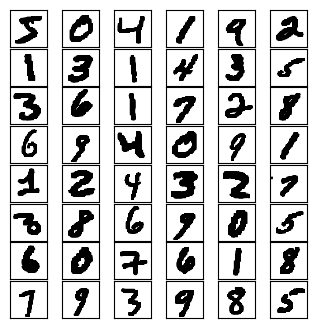

In [2]:
data, target = fetch_openml('mnist_784', version=1, return_X_y=True)
data = np.array(data)
target = np.array(target,dtype = 'int')
def plot_digits(data,rows,columns,size):
    fig, ax = plt.subplots(rows, columns, figsize=size,
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(28, 28), cmap='binary')
        im.set_clim(0, 16)
plot_digits(data,8,6,(4,4))


Each of the 70,000 data points is a 784 dimensional vector, where each feature-dimension is a number from 0 to 255 representing pixel intensity. We will attempt to find a 2-dimensional spatial representation that conveys the similarities among the data points and keeps data in the same classes close together.

In [3]:
# get random subset of digits data
sample = np.random.permutation(data.shape[0])[:1000]
data = data[sample]
labels = target[sample]

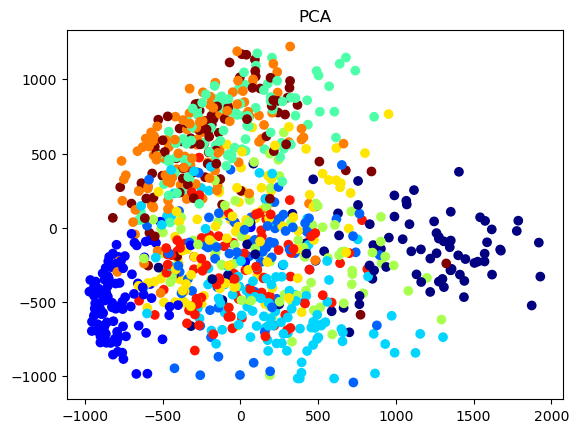

In [4]:

clf = PCA(n_components=2)
data_pca = clf.fit_transform(data)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap=plt.get_cmap('jet', 10))
plt.title('PCA');

We now use MDS from the `sklearn.manifold` library

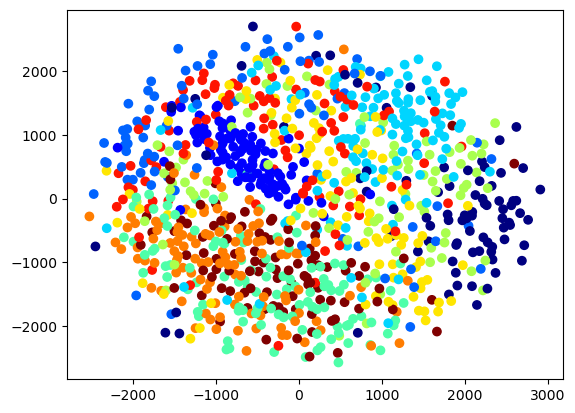

In [5]:
# compute pairwise distance matrix with sklearn
D = pairwise_distances(data)
model = MDS(n_components=2)
data_mds = model.fit_transform(data)
plt.scatter(data_mds[:, 0], data_mds[:, 1], c=labels, cmap=plt.get_cmap('jet', 10))


Example 2: We generate a non-linear dataset that is often used to test manifold learning algorithms, and we use `sklearn.manifold` to apply MDS and visualize the resulting embedding.

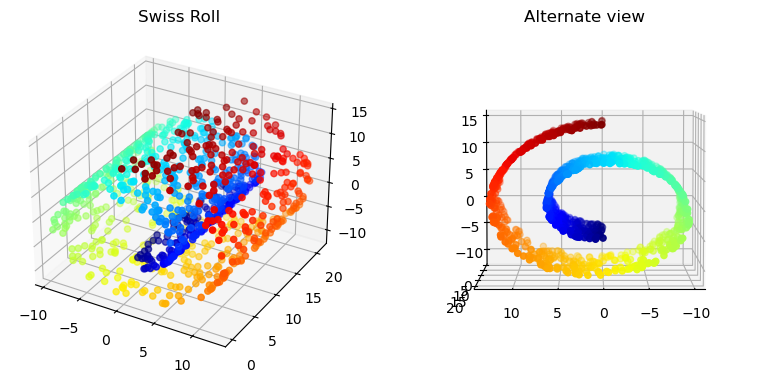

In [6]:

from mpl_toolkits import mplot3d
X, color = make_swiss_roll(1000, random_state=0)
plt.style.use('default')
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet);
plt.title('Swiss Roll')
ax = fig.add_subplot(1, 2, 2, projection='3d')
plt.title('Alternate view')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4,90);

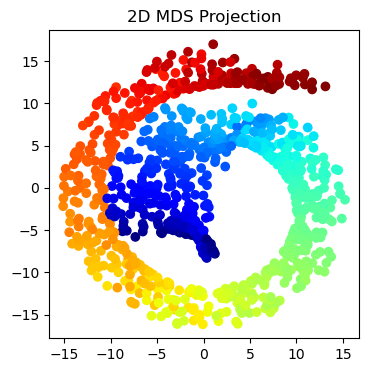

In [7]:
model = MDS(n_components=2, random_state=2)
X_mds = model.fit_transform(X)
fig = plt.figure(figsize=(4,4))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.jet)
plt.title('2D MDS Projection')
plt.show();

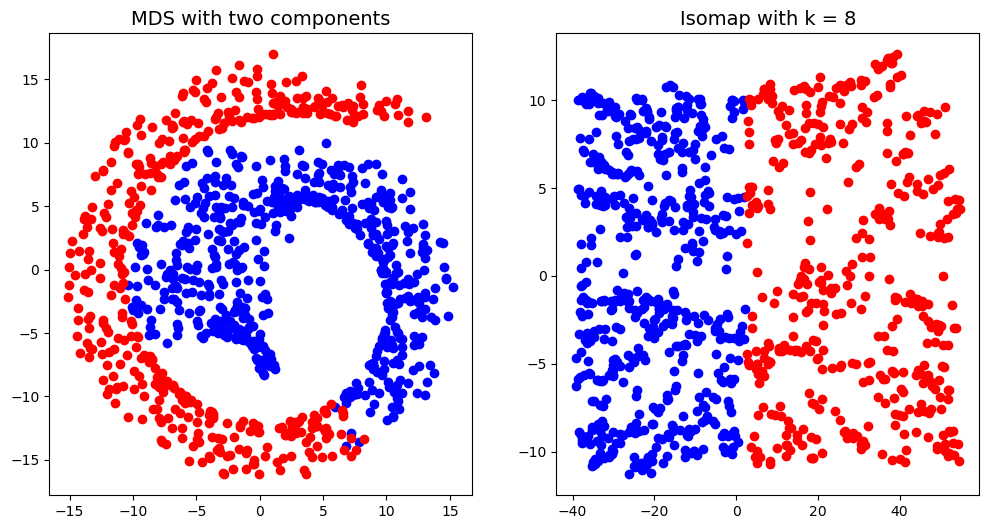

In [8]:

fig = plt.figure(figsize=(12,6))
k = 8
model = Isomap(n_components=2, n_neighbors=k)
X_iso = model.fit_transform(X)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_mds[(color < 10), 0], X_mds[(color < 10), 1], c='blue')
ax.scatter(X_mds[(color >= 10), 0], X_mds[(color >= 10), 1], c='red')
ax.set_title('MDS with two components', size=14)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_iso[(color < 10), 0], X_iso[(color < 10), 1], c='blue')
ax.scatter(X_iso[(color >= 10), 0], X_iso[(color >= 10), 1], c='red')
ax.set_title('Isomap with k = ' + str(k), size=14);

Lets go back to the MNIST data set.  

Text(0.5, 1.0, 'ISOMAP')

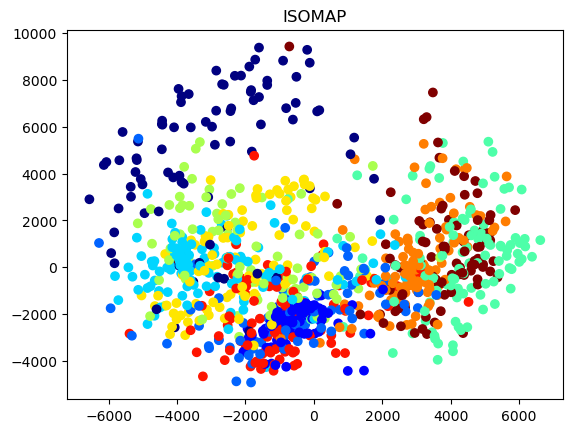

In [9]:
# use only 1/30 of the data: full dataset takes a long time!
model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap=plt.get_cmap('jet', 10))
plt.title("ISOMAP")

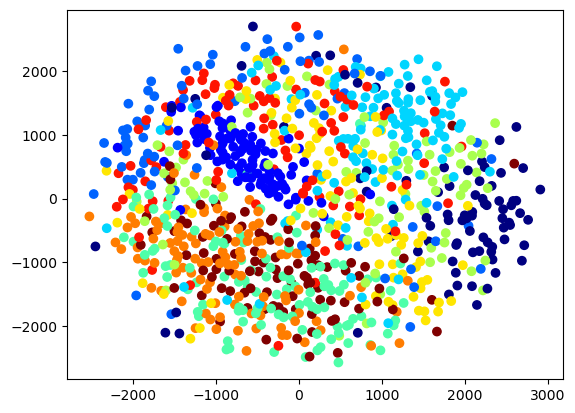

In [10]:
plt.scatter(data_mds[:, 0], data_mds[:, 1], c=labels, cmap=plt.get_cmap('jet', 10))
plt.show()

In [11]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

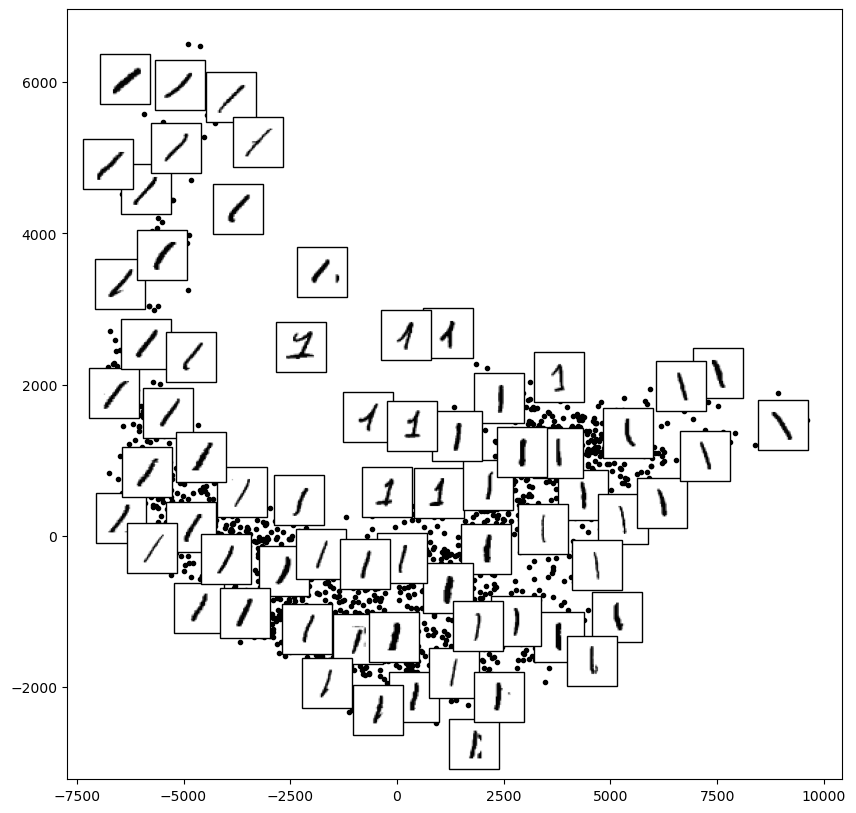

In [12]:
data, target = fetch_openml('mnist_784', version=1, return_X_y=True)
data = np.array(data)
target = np.array(target,dtype = 'int')
data1 = data[target == 1,:][::4]
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data1, model, images=data1.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

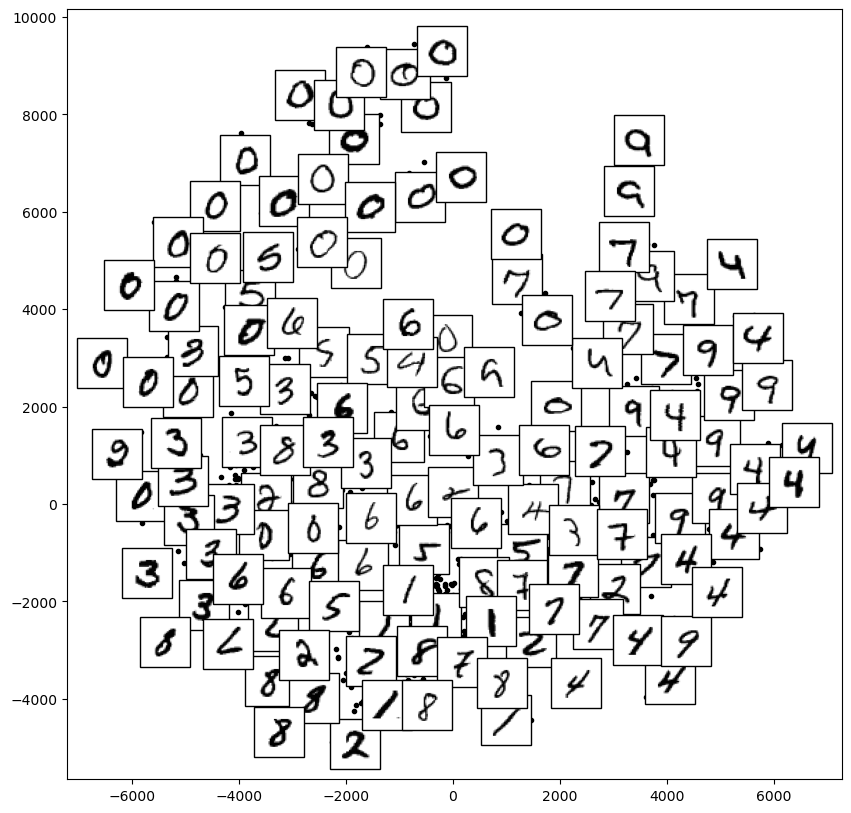

In [13]:
data1 = data[sample]
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data1, model, images=data1.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')